Hello, Adam! 

My name is Maksim Bulatov. I will check your project. I hope my review will be helpful. 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Sample text
</div>

# Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building the **credit score** of a potential customer. The **credit score** is used to evaluate the ability of a potential borrower to repay their loan.

[In this notebook you're provided with hints and brief instructions and thinking prompts. Don't ignore them as they are designed to equip you with the structure for the project and will help you analyze what you're doing on a deeper level. Before submitting your project, make sure you remove all hints and descriptions provided to you. Instead, make this report look as if you're sending it to your teammates to demonstrate your findings - they shouldn't know you had some external help from us! To help you out, we've placed the hints you should remove in square brackets.]

[Before you dive into analyzing your data, explain the purposes of the project and hypotheses you're going to test.]

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great idea to have a description of the project at the beginning!
</div>

## Open the data file and have a look at the general information. 

[Start with importing the libraries and loading the data. You may realise that you need additional libraries as you go, which is totally fine - just make sure to update this section when you do.]

<div class="alert alert-info"> <b>Good Morning! </b> <br>
    It's saturday morning, I'm over a week late on this project. If it's ok with you, I'd like to turn this in as a rough draft. Get feedback and clarification on the work I've done so far, and if I'm on the right track, I'll finish the categorization and conclusions section on the next pass..
</div>


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Do not forget also to ask your teacher in slack if you have questions or not sure how to proceed further:) They can reply faster to you and give you some usefull suggestions. Let us proceed further throught your code.
</div>

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
try:
    df = pd.read_csv('credit_scoring_eng.csv')
except:
    df = pd.read_csv('/datasets/credit_scoring_eng.csv')

#Test if the CSV loaded correctly
display(df.head(5))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

It is a good habbit to upload all the necessary libraries at the beginning of the project. Well done! 
Another good habbit is to separte the libraries upload and data upload. So it is better to do it in the separate cells. Also I like your code to load the data.
</div>

<div class="alert alert-info"> <b>two cells, updated as sugested</b> <br>


## Task 1. Data exploration

**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan

[Now let's explore our data. You'll want to see how many columns and rows it has, look at a few rows to check for potential issues with the data.]

<div class="alert alert-info"> <b>debt - zero to one</b> <br>
0 == debt is in good standing <br>
1 == default
<br>

<div class="alert alert-block alert-warning">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

If you are not sure what it means you can always ask your teacher or you can also quickly check how many rows are with 0 and how many with 1. I would say there are more zeros:) More people are managing their finance well, unless it is some market crash. 
</div>

In [3]:
print(df['debt'].value_counts())

0    19784
1     1741
Name: debt, dtype: int64


<div class="alert alert-info"> <b>Confirmed</b> <br>
    0 == in good standing <br>
    1 == debt delinquent <br>


In [4]:
# Let's see how many rows and columns our dataset has
df.info()

#Looks like there is something odd going on with the days_employed and total_Income column. Will look into that.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


<div class="alert alert-block alert-warning">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

```.info()``` is our most popular function and allows you to see a data structure, but also to see the amount of rows. You do not need additional lines of code for this. Could you please correct it?
</div>

<div class="alert alert-info"> <b>Student Comment</b> <br>
Confirmed


In [5]:
# Display the first 15 rows
display(df.head(20))


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


 <div class="alert alert-info"> <b>Notes:</b> <br>
Negative Numbers in days employed <br>
NaN value in at row 12 for days_employed and total_income. <br>
Probable the pattern holds thought the whole dataset. <br>
As those are the columns that are out of sync from above <br>
Will investigate further <br>

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Well done description of the data! Sometimes it is enough to see couple of lines of the data to detect some artifacts.
</div>

 <div class="alert alert-info"> <b>Note:</b> <br>
The values count from above suggested there should be 21525 non_null values... but I cound 232212... What am I missing?") <br>
    Oh Size and len are not the same.

</div>

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

I think you have confused here ```.shape()``` with ```.size()``` functions. Size gives the size of your dataset, meaning amount of rows multiply by amount of columns. I think also these part of code can be removed. Below you show how many rows are having missing values. Could you please correct it?
</div>

 <div class="alert alert-info"> <b>Student Comment</b> <br>
Agreed, I was confusing .shape() and .size(). I knew something wasn't right, I just coun't put my finger on it. thank you. <br>
I've cleaned up the code, and moved it all to the cell below.
    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
Great!
</div>


 <div class="alert alert-info"> <b>Note:</b> <br>
DF_sync is designed to capture all of the rows where ['days_employed'] AND ['total_income'] have NaN values. <br>
    This returns 2174 rows. This is the same differene in row counts we expect to see from the values_count() expression earlier. <br>
Hypothesis If rows where 'days_employed' == x, AND rows 'total_income' == x, Then if the rows are the same rows, x should equil the number of rows where both Nan values for 'days_employed' and Nan values for 'total_income' are true. <br>
    <br>
    I'm trying to write a hypothesis. Please advise on a better way to write this out in simple language.

</div>

In [6]:
#Test to see if the data is symetric or non symetric.

# is the number of rows were Nan days_employed and NaN total_income == the rows were NaN is True is both columns.

print
days_employed_nan = df['days_employed'].isnull().sum()
print(f'There are {days_employed_nan} NaN entries in days employed')
total_income_nan = df['total_income'].isnull().sum()
print(f'There are {total_income_nan} NaN entries in total_income')
df_sync = df[(df['days_employed'].isnull()) & (df['total_income'].isnull())]
print(f'There are {len(df_sync)} rows where total_income and days_employed are both NaN')
print('Thus, the missing values are in sync, (and not escew) accross the data set.')

There are 2174 NaN entries in days employed
There are 2174 NaN entries in total_income
There are 2174 rows where total_income and days_employed are both NaN
Thus, the missing values are in sync, (and not escew) accross the data set.


 <div class="alert alert-info"> <b>Hypothosis:</b> <br>
Unemployed individuals might have NaN values for both days_employed and total_income. <br>
    Difficult to imagine another cause with the information we have available.

</div>

<div class="alert alert-block alert-warning">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

Great idea to check if the missing values in both columns are in the same rows. As we can see it is true, but you can double check by calculating how many rows are missing in the original dataset.

Concerning your code: remove the lines which are not related to the results, basically you can write just one line of the code to print the shape without even using ```print()``` function. Remember your code should be clean and if it is possible simple as well. 
    
Description: I like you describe why and what you do. It is really important to do it here. You can write your ideas why we have missing values, at this moment we do not know for sure, we need to investigate more.
    
Could you please correct it?
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
Good! It is ok to assume something, but it should be always checked.
</div>


In [7]:
#filter a NaN only table
df_nan = df[df.isna().any(axis=1)]
df_nan.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding


In [8]:
# Let's apply multiple conditions for filtering data and look at the number of rows in the filtered table.



print(f'The total data set is {df.shape} rows long')
print(f'The NaN data set is {df_nan.shape} rows long')
df_nan_percent = df_nan.size / df.size
print(f'Whow! The NaN values are {df_nan_percent:.2%} of the dataframe. We might have a problem.')

# I wanted to practive a bit with f'strings, as they're still a bit intimidating. 
# Can re-write if needed for best practices.

The total data set is (21525, 12) rows long
The NaN data set is (2174, 12) rows long
Whow! The NaN values are 10.10% of the dataframe. We might have a problem.


 <div class="alert alert-info"> <b>Note:</b> <br>
Whow! The NaN rows are 10.10% of the dataframe. We might have a problem. <br>
</div>

<div class="alert alert-block alert-warning">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

It is better to operate here with ```.shape``` function. Percentage calculated correctly:) 

</div>

 <div class="alert alert-info"> <b>Student Note</b> <br>
Updated. Please confirm correct now? <br>
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
Correct!
</div>


**Intermediate conclusion**

[Does the number of rows in the filtered table match the number of missing values? What conclusion can we make from this?]

[Calculate the percentage of the missing values compared to the whole dataset. Is it a considerably large piece of data? If so, you may want to fill the missing values. To do that, firstly we should consider whether the missing data could be due to the specific client characteristic, such as employment type or something else. You will need to decide which characteristic *you* think might be the reason. Secondly, we should check whether there's any dependence missing values have on the value of other indicators with the columns with identified specific client characteristic.]

[Explain your next steps and how they correlate with the conclusions you made so far.]

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I am not sure what this chapter mean? Do you want to describe here the next steps? Could you please change the chapter title, it is slightly misleading? It would be great if you could separate different parts of data evaluation in different chapters. It would be easier to follow your report. Also imagine this report you would show a bank’s loan division. So my message is to treat this project as a working case, all questions you have to figure out before writing the project. 

</div>

In [9]:
# Checking distribution
print('-Original Data - income_type - ')
print(df['income_type'].value_counts(normalize=True))
print()
print('-NaN Data - income_type - ')
print(df_nan['income_type'].value_counts(normalize=True))
print()

-Original Data - income_type - 
employee                       0.516562
business                       0.236237
retiree                        0.179141
civil servant                  0.067782
entrepreneur                   0.000093
unemployed                     0.000093
student                        0.000046
paternity / maternity leave    0.000046
Name: income_type, dtype: float64

-NaN Data - income_type - 
employee         0.508280
business         0.233671
retiree          0.189972
civil servant    0.067617
entrepreneur     0.000460
Name: income_type, dtype: float64



<div class="alert alert-info"> <b>Note: income_type</b> <br>
We created a dataframe of only the NaN data, and compared it's normalized value_counts to the original data, using income_type as our reference column. Distributions are similar, categories are within 1% of each other. <br>
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great idea to check the distribution of the income_type column. 

</div>

In [10]:
# Running a similar analysis for age data
print('-Original Data - age')
print(df['dob_years'].value_counts(normalize=True).sort_index())
print()
print('-NaN Data - age')
print(df_nan['dob_years'].value_counts(normalize=True).sort_index())
print()


-Original Data - age
0     0.004692
19    0.000650
20    0.002369
21    0.005157
22    0.008502
23    0.011800
24    0.012265
25    0.016585
26    0.018955
27    0.022904
28    0.023368
29    0.025319
30    0.025087
31    0.026016
32    0.023693
33    0.026992
34    0.028014
35    0.028664
36    0.025784
37    0.024948
38    0.027782
39    0.026620
40    0.028293
41    0.028200
42    0.027735
43    0.023833
44    0.025412
45    0.023089
46    0.022067
47    0.022300
48    0.024994
49    0.023600
50    0.023879
51    0.020813
52    0.022485
53    0.021324
54    0.022253
55    0.020581
56    0.022625
57    0.021370
58    0.021417
59    0.020627
60    0.017515
61    0.016492
62    0.016353
63    0.012497
64    0.012311
65    0.009013
66    0.008502
67    0.007758
68    0.004599
69    0.003949
70    0.003020
71    0.002695
72    0.001533
73    0.000372
74    0.000279
75    0.000046
Name: dob_years, dtype: float64

-NaN Data - age
0     0.004600
19    0.000460
20    0.002300
21    0.008280


<div class="alert alert-info"> <b>Note:</b> <br>
I'd love to print the two data frames above side by side for easier comparison <br>
    Let's go ahead and do that.
</div>

In [11]:
# We create two new dataframes and concatenate them together, then subtract the difference.
# Our anticipation was for a slight difference...

dob_years = df['dob_years'].value_counts(normalize=True).sort_index()
dob_years_nan = df_nan['dob_years'].value_counts(normalize=True).sort_index()

df_nan_age_compare  = pd.concat([dob_years,dob_years_nan], axis=1, keys=['dob_years','dob_years_nan'])
df_nan_age_compare['diference'] = df_nan_age_compare['dob_years'] - df_nan_age_compare['dob_years_nan']
print(df_nan_age_compare)

    dob_years  dob_years_nan  diference
0    0.004692       0.004600   0.000092
19   0.000650       0.000460   0.000190
20   0.002369       0.002300   0.000069
21   0.005157       0.008280  -0.003123
22   0.008502       0.007820   0.000682
23   0.011800       0.016559  -0.004759
24   0.012265       0.009660   0.002605
25   0.016585       0.010580   0.006006
26   0.018955       0.016099   0.002855
27   0.022904       0.016559   0.006344
28   0.023368       0.026219  -0.002851
29   0.025319       0.022999   0.002320
30   0.025087       0.026679  -0.001592
31   0.026016       0.029899  -0.003883
32   0.023693       0.017019   0.006674
33   0.026992       0.023459   0.003533
34   0.028014       0.031739  -0.003725
35   0.028664       0.029439  -0.000774
36   0.025784       0.028979  -0.003195
37   0.024948       0.024379   0.000569
38   0.027782       0.024839   0.002943
39   0.026620       0.023459   0.003161
40   0.028293       0.030359  -0.002066
41   0.028200       0.027139   0.001061


<div class="alert alert-info"> <b>Note: Age</b> <br>
Variance on the age variable is nominal. This supports our hypothisis that the NaN data does not corrilate around the Age Data.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done! Indeed age also do not correlate with the missing values. 

</div>

<div class="alert alert-info"> <b>Next steps: </b> <br>


<div class="alert alert-info"> <b>Student Note: Updated </b> <br>


<div class="alert alert-block alert-warning">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

I like you write the descriptions after analyzing the data, but you should be more specific and write only that can help to follow your report. As I have mentioned previously we try to create here a realy case at your work. Imaging you are writing this report for your team or manager. They would need to read this report, understand it. Some of your ideas can be just implemented with code and with couple of sentences and it will allow the reader to follow your report.

</div>

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

I understand, it might be confusing. The best way would be to ask your tacher for an advice, but you wrote some good ideas below, so you are on the right direction. I would delete this cell.

</div>

 <div class="alert alert-info"> <b>Complete</b> <br>


<div class="alert alert-info"> <b>Intermediate conclusion</b> <br>
The rows with NaN data do not seem to corilate against any of the columns we tested for. <br>
It seems the data originated when the Data was created. <br>
<br>

</div>

<div class="alert alert-block alert-warning">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

You are right, the missing values do not correlate to any other columns. It seems it is an error when the data were created maybe? I am not 100% agree about the unemployment, as we can see many of them have work title, just the amount of working experience is missing.

</div>

<div class="alert alert-info"> <b>Next Steps | Data transformation </b> <br>
    <b>education:</b> education column needs to be shifted to lowercase, and the data needs to be cleaned up a bit.
    <br>
<b>days_employed:</b> I suspect days_employed can be shifted to absolute value to make all numbers positive. <br>
<b>purpose:</b> The purpose column is going to need a serous reoganization. Default Categories are a mess. <br>
Review each column and determine what issues we have, and what repair the data. <br>
Duplicates <br>
different registers <br>
incorrect artifacts <br>
missing values <br>

</div>

<div class="alert alert-block alert-warning">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

Could you please separate the different steps of data evaluation with chapters? it would make to look your report much better.

</div>

In [12]:
# creating a new variable called data, which we'll use for datatransformations.
data = df
# renaming 'dob_years' to 'age'
data = data.rename(columns = {'dob_years' : 'age'})
                   
#Check it worked
data.head(2)

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done! Column is renamed. Write column naming is also important.

</div>

In [13]:
# age vs income_type
print(data.pivot_table(index='age', columns='income_type', values='debt', aggfunc='count', margins=True))

income_type  business  civil servant  employee  entrepreneur  \
age                                                            
0                20.0            6.0      55.0           NaN   
19                7.0            1.0       6.0           NaN   
20               16.0            2.0      33.0           NaN   
21               35.0            7.0      69.0           NaN   
22               64.0            6.0     111.0           NaN   
23               67.0           11.0     176.0           NaN   
24               82.0           19.0     162.0           NaN   
25              108.0           27.0     222.0           NaN   
26              119.0           38.0     249.0           NaN   
27              143.0           37.0     309.0           1.0   
28              149.0           39.0     314.0           NaN   
29              148.0           49.0     348.0           NaN   
30              161.0           47.0     332.0           NaN   
31              177.0           52.0    

<div class="alert alert-info"> <b>Next Steps | Data transformation </b> <br>
1 entrepreneur who is 27, and another who is 58 years old. <br>
So few business owners? <br>
Lots of age zero people as well. That's odd. <br>
</div>

<div class="alert alert-block alert-warning">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

Great you have checked the correlation between age and income type columns. What else can we see from this comparison? 

</div>

<div class="alert alert-info"> <b>Age zero people </b> <br>
updated age zero people above.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
What should we do with the clients with zero age?
</div>


<div class="alert alert-info"> <b>Drop Zero</b> <br>
I drop age zero people latter in the notebook.

In [14]:
# Let's see all values in education column to check if and what spellings will need to be fixed
print(data['education'].unique())

["bachelor's degree" 'secondary education' 'Secondary Education'
 'SECONDARY EDUCATION' "BACHELOR'S DEGREE" 'some college'
 'primary education' "Bachelor's Degree" 'SOME COLLEGE' 'Some College'
 'PRIMARY EDUCATION' 'Primary Education' 'Graduate Degree'
 'GRADUATE DEGREE' 'graduate degree']


In [15]:
# Fix the registers if required

#lets's make everything lowercase to start.
data['education'] = data['education'].str.lower()

#test
print(data['education'].unique())

["bachelor's degree" 'secondary education' 'some college'
 'primary education' 'graduate degree']


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great! Lowercase in education column is fixed.  

</div>

<div class="alert alert-info"> <b>Reviewing the Data for the children column </b> <br>

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

Please use the same style for your writing and descriptions. We should be able to separate code from text. It is related to the whole project.

</div>

<div class="alert alert-info"> <b>Updated </b> <br>

In [16]:
# Let's see the distribution of values in the `children` column
#print(data['children'].unique())
print(data['children'].value_counts())

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


<div class="alert alert-info"> <b> Observation and next steps </b> <br>
76 people have 20 children - dropping from the data set. <br>    
</div>

In [17]:
# drop 20 in ['children']
data.drop(data[data['children'] == 20].index, inplace = True)

# test
print(data['children'].value_counts())

 0    14149
 1     4818
 2     2055
 3      330
-1       47
 4       41
 5        9
Name: children, dtype: int64


<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

Why we have replaced 20 with 2 children? As you are not sure why this have happened, I would also consider if you delete this data, how would this effect our dataset?  

</div>

<div class="alert alert-info"> <b>Updated as suggested</b> <br>    
</div>

<div class="alert alert-info"> <b> next step </b> <br>
Drop the rows with a -1's in the children's data, as it only represents < .0002 of the total data set.<br>
    
    
</div>

In [18]:
# drop -1 in ['children']
data.drop(data[data['children'] == -1].index, inplace = True)

# test
print(data['children'].value_counts())

0    14149
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Totally agree! This data seems to be an error and can be deleted since the amount of this rows is significant small in comparison to the whole dataset.

</div>

In [19]:
# Find problematic data in `days_employed`, if they exist, and calculate the percentage
print(data['days_employed'].head(10))

0     -8437.673028
1     -4024.803754
2     -5623.422610
3     -4124.747207
4    340266.072047
5      -926.185831
6     -2879.202052
7      -152.779569
8     -6929.865299
9     -2188.756445
Name: days_employed, dtype: float64


<div class="alert alert-info"> <b> observation</b> <br>
Negative numbers <br>
    <br>
    Let's converte the negative numbers to their absolute value. <br>
    And do some quick math to get a sense for what these numbers look like in years.
</div>

<div class="alert alert-block alert-warning">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

Here just a look at the table first 10 rows would be enough to see the problem with the column. Could you please correct it?

</div>

In [20]:
# Address the problematic values, if they exist
data['days_employed'] = abs(data['days_employed'])


<div class="alert alert-block alert-warning">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

Great idea to change the values to positive ones. But again, just to show a table as below would help to see clearly, the problem was fixed.

</div>

<div class="alert alert-info"> <b> Updated as suggested</b> <br>

</div>

In [21]:
data['years_employed'] = data['days_employed'] / 365

#test
display(data.head(15))

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,2.537495
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,7.888225
7,0,152.779569,50,secondary education,1,married,0,M,employee,0,21731.829,education,0.418574
8,2,6929.865299,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,18.985932
9,0,2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,5.996593


<div class="alert alert-info"> <b> A Question on years worked? </b> <br>
How long have these people been working! <br>
    Row 5 has been working for over 900 years!<br>
    Looks like we have another problem to address...
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I like your idea to actually check the days the person was working in years:) It does look some of them are immortal:)

</div>

In [22]:
display(data['years_employed'].sort_values(ascending=False).head())

6954     1100.699727
10006    1100.591265
7664     1100.479708
2156     1100.477991
7794     1100.448904
Name: years_employed, dtype: float64

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

Unfortunately here, we have an error in our Jupyter Notebook Enviroment. Did you run your code completly here in the system or you were writing your code locally on your computer? The problem is the pandas versions are not the same and ignore_index is not available here. Could you please fix this error first and I believe you have used in some code also below. So, please fix this error first, so i can continue to check your work further. 
    
Concerning to drop the rows: we remove a lot of data from our dataset and this will influence our results. Before doing this, why do you think we have such numbers? Why the values for days employed are float? Do we need this column afterwards to answer our questions from the project description? Please revise this part of the project, I am sure you can do it. Please scroll down to the end of the project for my final comment and advice to you.  

</div>

<div class="alert alert-info"> <b> Student Note</b> <br>
I thought about it, and came up with a much simpler aproach. Updated above.
</div>

<div class="alert alert-info"> <b> 1000+ years!? </b> <br>
A significant portion of our dataset has been employed for more than 800 years! <br>
    This will certainly skew any conclusions we have that references this important metric. <br>
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>

Yes, it is strange we have so big numbers! Good thing we detect it, we cannot change it or replace it, so we can only show it to our team and tell them about this strange behaviour. Maybe it was an error while uploading the dataset. 
</div>


In [23]:
# Check the `age` for suspicious values and count the percentage
display(data.sort_values(by = 'age').head())


,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
8574,0,NaN,0,secondary education,1,married,0,F,employee,0,NaN,property,NaN
11664,0,2613.538371,0,secondary education,1,married,0,F,business,0,11734.107,going to university,7.160379
11289,1,223.709545,0,some college,2,civil partnership,1,M,employee,0,40971.287,to have a wedding,0.612903
6859,1,260.992722,0,some college,2,civil partnership,1,F,employee,0,20519.463,buy real estate,0.715049
4922,0,336516.005867,0,bachelor's degree,0,widow / widower,2,F,retiree,1,29369.017,to own a car,921.961660


In [24]:
print(data['age'].value_counts())
print()
print(data['age'].value_counts(normalize=True))

35    614
40    603
41    603
34    597
38    595
42    592
33    577
39    572
31    556
36    553
29    543
44    543
48    536
30    536
37    531
43    510
50    509
32    506
49    505
28    501
45    494
27    490
52    483
56    482
47    480
54    476
46    469
58    461
53    457
57    457
51    446
59    441
55    441
26    406
60    376
25    356
61    353
62    351
63    268
24    263
64    263
23    252
65    194
66    183
22    183
67    167
21    110
0     100
68     99
69     83
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: age, dtype: int64

35    0.028689
40    0.028175
41    0.028175
34    0.027895
38    0.027801
42    0.027661
33    0.026960
39    0.026726
31    0.025979
36    0.025839
29    0.025371
44    0.025371
48    0.025044
30    0.025044
37    0.024811
43    0.023830
50    0.023783
32    0.023643
49    0.023596
28    0.023409
45    0.023082
27    0.022895
52    0.022568
56    0.022521
47    0.022428
54    0.022241
46   

<div class="alert alert-info"> <b> 0 Years Old? </b> <br>
101 people Zero years old... that's not going to work. <br>
    compared to our dataset at large, 101 people is not that many <br>
    <br>
    Will drop zero age from the data set.
</div>

<div class="alert alert-info"> <b> trending older </b> <br>
    Our oldest person is 75, which is within the bounds of a normal human lifespan, nothing odd there. <br>
</div>

In [25]:
# Drop the 101 age zero people
data.drop(data[data['age'] == 0].index, inplace = True)
#test
print(data['age'].value_counts())

35    614
41    603
40    603
34    597
38    595
42    592
33    577
39    572
31    556
36    553
44    543
29    543
48    536
30    536
37    531
43    510
50    509
32    506
49    505
28    501
45    494
27    490
52    483
56    482
47    480
54    476
46    469
58    461
57    457
53    457
51    446
55    441
59    441
26    406
60    376
25    356
61    353
62    351
63    268
64    263
24    263
23    252
65    194
22    183
66    183
67    167
21    110
68     99
69     83
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: age, dtype: int64


<div class="alert alert-block alert-success">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
Correct, since it is such a small amount we can just drop it.
</div>


In [26]:
# Let's see the values for the family status column

#dropna = False to confirm we don't have NaN values in this column
data['family_status'].value_counts(dropna=False)


married              12254
civil partnership     4139
unmarried             2783
divorced              1179
widow / widower        947
Name: family_status, dtype: int64

<div class="alert alert-info"> <b> No issues found with family status</b> <br>
</div>

In [27]:
# What's going on with the family_status_id'? Do these corrilate with the 'family_status' column?
print(data['family_status_id'].value_counts())

0    12254
1     4139
4     2783
3     1179
2      947
Name: family_status_id, dtype: int64


!!!! Family Status and Family Status ID are the same, reference debt instead

In [28]:
# Let's break out a pivot table to check.
display(data.pivot_table(index='family_status_id', columns='family_status', values='debt', aggfunc='count', margins=True))

family_status,civil partnership,divorced,married,unmarried,widow / widower,All
family_status_id,,,,,,
0,NaN,NaN,12254.0,NaN,NaN,12254
1,4139.0,NaN,NaN,NaN,NaN,4139
2,NaN,NaN,NaN,NaN,947.0,947
3,NaN,1179.0,NaN,NaN,NaN,1179
4,NaN,NaN,NaN,2783.0,NaN,2783
All,4139.0,1179.0,12254.0,2783.0,947.0,21302


<div class="alert alert-info"> <b> 'family_status_id' == 'family_status'</b> <br>
0 == married <br>
1 == civil partnership <br>
2 == widow / widower<br>
3 == divorced <br> 
4 == unmarried <br>
</div>

<div class="alert alert-info"> <b> Student note: No Problems</b> <br>
I stil don't see any problems with this column. Please let me know if I overlooked something.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
Correct!
</div>


<div class="alert alert-info"> <b> Gender</b> <br>
</div>

In [29]:
# Let's see the values in the gender column
data['gender'].value_counts()

F      14083
M       7218
XNA        1
Name: gender, dtype: int64

<div class="alert alert-info"> <b> 1 outlier</b> <br>
XNA <br>
    Will drop 1 row from our data set and move on. <br>
</div>

In [30]:
#drop XNA

#Which of these two solutions is best practices?

#data_copy = data[data.gender != 'XNA']

#OR

data.drop(data.loc[data['gender']=='XNA'].index, inplace=True)

In [31]:
# Check the result
data['gender'].value_counts()


F    14083
M     7218
Name: gender, dtype: int64

<div class="alert alert-block alert-success">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
Success. Everything is done succesfully.
</div>


<div class="alert alert-info"> <b> Income Type</b> <br>
</div>

In [32]:
# Let's see the values in the column
data['income_type'].value_counts()

employee                       10996
business                        5033
retiree                         3819
civil servant                   1447
entrepreneur                       2
unemployed                         2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

<div class="alert alert-info"> <b> Notes</b> <br>
    entrepreneur, employee and business? These can probably be combined. <br>
    We don't have any reason to think "business" is "business owner", and it doesn't match our "2" entrepreneurs <br>
    We Don't have a category for investment income, or Rent <br>
    <br>
    These 4 designations have so few data points, we will merge the business related categories, and drop student and paternity / maternity, and unemployed.<br>
2 == unemployed <br>
2 == entrepreneur <br>
1 == paternity / maternity leave <br>
1 == student <br>
    <br>
    
    
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
We cannot assume here these three words are the same. This is really separate income types and combining it will change our results of the analysis significantly. Please correct here and below your code.
</div>


<div class="alert alert-info"> <b> Updated</b> <br>
code updated below as suggested
    <br>
    
    
</div>

In [33]:
# replace employee with business
#data['income_type'].replace(to_replace = 'employee', value= 'business', inplace = True)

# replace entrepreneur with business
#data['income_type'].replace(to_replace = 'entrepreneur', value= 'business', inplace = True)

### Updating Code to Drop employee and Entrepreneur ###

# drop employee
data.drop(data.loc[data['income_type']=='employee' ].index, inplace=True)

# drop entrepreneur
data.drop(data.loc[data['income_type']=='entrepreneur' ].index, inplace=True)

# drop student
data.drop(data.loc[data['income_type']=='student' ].index, inplace=True)

# drop paternity / maternity leave
data.drop(data.loc[data['income_type']=='paternity / maternity leave' ].index, inplace=True)

# drop unemployed
data.drop(data.loc[data['income_type']=='unemployed' ].index, inplace=True)

In [34]:
# Check the result - make sure it's fixed
data['income_type'].value_counts()


business         5033
retiree          3819
civil servant    1447
Name: income_type, dtype: int64

<div class="alert alert-info"> <b> Loan purpose </b> <br>
   The  Loan purpose column tells us why people are taking out these loans. <br>
    It's a mess. <br>
    Let's clean it up. <br>
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
Please correct above this column.
</div>


<div class="alert alert-info"> <b> Please confirm the problem is corrected as suggested. </b> <br>
</div>

<div class="alert alert-info"> <b> Drop Dupes </b> <br>
   Let's drop some dupes! <br>
    =^)
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>

Checking for duplicates should be done after transforming all necessary columns to a certain order, which you did. Before intorducing any categorization, we should check for duplicates and drop them. So just move this part of the code, before categorization.
</div>


<div class="alert alert-info"> <b> Updated code location: Is this the best place for this code? If not, please advise. </b> <br>
</div>

In [35]:
# Checking duplicates
data.duplicated().sum()


36

In [36]:
# Address the duplicates, if they exist

data = data.drop_duplicates()
#data = data.reset_index()
data.head()

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,2.537495
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,7.888225
10,2,4171.483647,36,bachelor's degree,0,married,0,M,business,0,18230.959,buy real estate,11.428722
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding,NaN


In [37]:
# Test Drop duplicates
data.duplicated().sum()

0

In [38]:
data.purpose.value_counts()

having a wedding                            379
wedding ceremony                            371
real estate transactions                    353
to have a wedding                           345
purchase of the house for my family         325
buy commercial real estate                  312
transactions with my real estate            309
construction of own property                307
transactions with commercial real estate    306
purchase of the house                       305
building a property                         303
housing                                     301
building a real estate                      301
buy real estate                             292
buy residential real estate                 291
buying property for renting out             291
property                                    290
purchase of my own house                    290
housing renovation                          287
housing transactions                        282
cars                                    

<div class="alert alert-info"> <b> So many reasons! </b> <br>
   That's a lot of differenet reasons to take out a loan. <br>
   We will consolidate into some broad categories <br>
   And then use dictionares to consolidate the data into those categories. <br>
    <br>
   Lots of real estate transactions: Residential, Comercial, New Construction, Remodel. <br>
   Unfortunetly much of the Real Estate Data is unclear. "Real Estate Transaction", and "property" are not very clear. <br>
   In a real world data set, we would want to break out comercial loans into new construction, the vereous types of multi family transactions, and the vareous types of comercial, etc. - loaning money for new warehouse constuction has a comletly different risk profile then remodeling an existing hospital, as an example. <br>
    Similar distictions should be drawn between new cars and used cars. <br>
    As well as the different types of education, Ceramics at the local community college and a masters degree in cermaics and materials sciences have very different risk profiles. <br>
    <br>
    If we consolidate these into a few broad categories, we might lose some nuance, especially in real estate, but it will probably make the datasset more useful overall. <br>
    Frustratingly, many of the real estate categories could be either comercial or residential, and in trying to categorize them into one category or the other, we actually loose fidelity, rather than improve it.
    <br>
    -- education - There are 9 education categories <br>
    -- car - There are 9 car categories <br>
    -- Weddings - there are 3 wedding categories <br>
    -- Real Estate - there are 17 real estate categoires !!!<br>
    -- 38 purposes for taking out a loan in total... hmmm. <br>
    <br>
    Let's keep the original data in the dataframe, and create a new column with consolidated categories.
</div>



In [39]:
#Note: There is a more ellegant way to do this using dictionaries, and maybe apply(),
#but I can't quite figure it out, so here we are with this clunky work around.

#Not memory or process efficent at all, =^|

# Create a new column 'loan_purpose' which is a copy of the 'purpose' data
data['loan_purpose'] = data['purpose']

#replace the data in 'loan_purpose'

#wedding
data['loan_purpose'].replace('wedding ceremony', 'wedding', inplace = True)
data['loan_purpose'].replace('having a wedding', 'wedding', inplace = True)
data['loan_purpose'].replace('to have a wedding', 'wedding', inplace = True)

#car
data['loan_purpose'].replace('buying my own car', 'auto', inplace = True)
data['loan_purpose'].replace('car', 'auto', inplace = True)
data['loan_purpose'].replace('second-hand car purchase', 'auto', inplace = True)
data['loan_purpose'].replace('to own a car', 'auto', inplace = True)
data['loan_purpose'].replace('buying a second-hand car', 'auto', inplace = True)
data['loan_purpose'].replace('cars', 'auto', inplace = True)
data['loan_purpose'].replace('to buy a car', 'auto', inplace = True)
data['loan_purpose'].replace('car purchase', 'auto', inplace = True)
data['loan_purpose'].replace('purchase of a car', 'auto', inplace = True)

#Education
data['loan_purpose'].replace('going to university', 'education', inplace = True)
data['loan_purpose'].replace('supplementary education', 'education', inplace = True)
data['loan_purpose'].replace('university education', 'education', inplace = True)
data['loan_purpose'].replace('to get a supplementary education', 'education', inplace = True)
#data['loan_purpose'].replace('education', 'education', inplace = True)
data['loan_purpose'].replace('getting an education', 'education', inplace = True)
data['loan_purpose'].replace('profile education', 'education', inplace = True)
data['loan_purpose'].replace('getting higher education', 'education', inplace = True)
data['loan_purpose'].replace('to become educated', 'education', inplace = True)

#Real Estate
data['loan_purpose'].replace('real estate transactions', 'real estate', inplace = True)
data['loan_purpose'].replace('buy commercial real estate', 'real estate', inplace = True)
data['loan_purpose'].replace('buying property for renting out', 'real estate', inplace = True)
data['loan_purpose'].replace('housing transactions', 'real estate', inplace = True)
data['loan_purpose'].replace('transactions with commercial real estate', 'real estate', inplace = True)
data['loan_purpose'].replace('housing', 'real estate', inplace = True)
data['loan_purpose'].replace('purchase of the house', 'real estate', inplace = True)
data['loan_purpose'].replace('purchase of the house for my family', 'real estate', inplace = True)
data['loan_purpose'].replace('construction of own property', 'real estate', inplace = True)
data['loan_purpose'].replace('property', 'real estate', inplace = True)
data['loan_purpose'].replace('transactions with my real estate', 'real estate', inplace = True)
data['loan_purpose'].replace('building a real estate', 'real estate', inplace = True)
data['loan_purpose'].replace('building a property', 'real estate', inplace = True)
data['loan_purpose'].replace('buy real estate', 'real estate', inplace = True)
data['loan_purpose'].replace('purchase of my own house', 'real estate', inplace = True)
data['loan_purpose'].replace('housing renovation', 'real estate', inplace = True)
data['loan_purpose'].replace('buy residential real estate', 'real estate', inplace = True)


#test
data.head(15)
#data.head(-15)

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,loan_purpose
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814,wedding
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,2.537495,real estate
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,7.888225,real estate
10,2,4171.483647,36,bachelor's degree,0,married,0,M,business,0,18230.959,buy real estate,11.428722,real estate
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding,NaN,wedding
14,0,1844.956182,56,bachelor's degree,0,civil partnership,1,F,business,1,26420.466,buy residential real estate,5.054674,real estate
18,0,400281.136913,53,secondary education,1,widow / widower,2,F,retiree,0,9091.804,buying a second-hand car,1096.660649,auto
24,1,338551.952911,57,secondary education,1,unmarried,4,F,retiree,0,46487.558,transactions with commercial real estate,927.539597,real estate
25,0,363548.489348,67,secondary education,1,married,0,M,retiree,0,8818.041,buy real estate,996.023258,real estate
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education,NaN,education


<div class="alert alert-block alert-warning">

<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>

Great job, but what to do if there are thousands of unique names for purpose column? You could use lemmatization approach, where you brake the phrases on single words, then count how often the same word is mentioned in the whole column and based on that choose the approach to categorise it. Examples: https://www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/
    
Or you could use the following approach:
    
    if 'house' in purpose or 'housing' in purpose or 'real estate' in purpose or 'property' in purpose:
        return 'Housing'
    
    and etc.
    
</div>

<div class="alert alert-info"> <b>  lemmatization </b> <br>
    lemmatization Looks super interesting. I look forward to learning more about it. <br>
    I'll keep this feedback in mind when I revisit this code to optimize it in the future.
</div>

In [40]:
# Check the shape of the dataset that you now have after your first manipulations with it
data.shape

(10263, 14)

<div class="alert alert-info"> <b> Dataset Overview </b> <br>
   We removed 249 rows of the original dataframe, or less than 1%. <br>
   children - We droped 47 rows with a -1 for the number of children. <br>
   We dropped 1 row where the gender was listed as XNA <br>
   We dropped 4 outlier rows from the income_type column <br>
   We dropped 96 duplicates <br>
   We dropped 101 individuals who are zero years old.
   <br>
   We consolidated and cleaned the education section by making all the data in the column lowercase - no material change to the data. <br>
    <br>
   days_employed AND ['total_income'] NaN values are still present at this point. <br>
    days_employed still has ouragously large numbers, with some people having worked for 800+ years <br>
    <br>   
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
Good conclusion!
</div>

# Working with missing values

In [41]:
display(data.isna().sum())

children               0
days_employed       1019
age                    0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        1019
purpose                0
years_employed      1019
loan_purpose           0
dtype: int64

### Restoring missing values in `total_income`

<div class="alert alert-info"> <b> Missing Values</b> <br>
   indicated in the cell above, days_employed and total_income both have NaN values, and we determined in this notebook that the rows are syncronus, meaning the same rows are missing both values in all cases. years_employed also has NaN values, as we created that column by referencing days_employed. <br>
    <br>
    Next Steps: <br>
    > address total_income missing values <br>
    <br>
    > create an age category for clients <br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;18-30 <br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;31-40 <br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;41-55 <br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;z56-75+ <br>
    <br>
    > create a new column with the age category <br>
    
</div>

In [42]:
# Write a function that calculates the age category
    
def age_group(df):

    """ create an age category for clients according to these rules
    >18 - error, child
    19-30 - early career
    31-40 - mid career
    41-55 - executive
    56-64 - senior executive
    65-122 - retired
    123+ - deceased
    """
    age=df
    
    
    if age <= 18:
        return 'error, child'
    if age >= 19:
        if age <= 30:
            return '19-30'
    if age >=31:
        if age <= 40:
            return '31-40'
    if age >= 41:
        if age <= 55:
            return '41-55'
    if age >= 56:
        if age <= 64:
            return '56-65'
    if age >= 65:
        if age <= 122:
            return 'retired'
    if age >= 123:
        return 'deceased'


<div class="alert alert-block alert-warning">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
You can also write:
    
    if 19 <= age <= 40
</div>

In [43]:
# Test if the function works
print(age_group(18))
print(age_group(19))
print(age_group(31))
print(age_group(40))
print(age_group(41))
print(age_group(55))
print(age_group(56))
print(age_group(64))
print(age_group(65))
print(age_group(121))
print(age_group(122))
print(age_group(123))

error, child
19-30
31-40
31-40
41-55
41-55
56-65
56-65
retired
retired
retired
deceased


In [44]:
# Creating new column based on function
data['age_group'] = data['age'].apply(lambda row: age_group(row))

#Test
data.head(5)

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,loan_purpose,age_group
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814,wedding,41-55
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,2.537495,real estate,19-30
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,7.888225,real estate,41-55
10,2,4171.483647,36,bachelor's degree,0,married,0,M,business,0,18230.959,buy real estate,11.428722,real estate,31-40
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding,NaN,wedding,retired


In [45]:
# Checking how values in the new column
data['age_group'].value_counts()

41-55      3302
56-65      2618
31-40      2143
19-30      1377
retired     823
Name: age_group, dtype: int64

<div class="alert alert-block alert-success">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
Good, we have our age group.
</div>

In [46]:
# Create a table without missing values and print a few of its rows to make sure it looks fine
data_skip = data.dropna()

data_skip.head(5)

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,loan_purpose,age_group
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814,wedding,41-55
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,2.537495,real estate,19-30
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,7.888225,real estate,41-55
10,2,4171.483647,36,bachelor's degree,0,married,0,M,business,0,18230.959,buy real estate,11.428722,real estate,31-40
14,0,1844.956182,56,bachelor's degree,0,civil partnership,1,F,business,1,26420.466,buy residential real estate,5.054674,real estate,56-65


In [47]:
#rounding the total_income column so it's easier to read
data['total_income'] = data['total_income'].apply(np.ceil)

# Can't convert floats to int until we fill the NaN data :^(
#data['total_income'] = data['total_income'].astype(int)

#data.head()

In [48]:
# age vs income_type : median
display(data.pivot_table(index='age_group', values='total_income', aggfunc='median', margins=True))


,total_income
age_group,
19-30,25249.0
31-40,27720.0
41-55,25384.5
56-65,20811.0
retired,18027.0
All,23855.5


In [49]:
# What is the source of income for the vareous loan types? Any inconsistancies in the data?
display(data.pivot_table(index='income_type', columns='loan_purpose', values='total_income', aggfunc='count', margins=True))


loan_purpose,auto,education,real estate,wedding,All
income_type,,,,,
business,949,840,2274,468,4531
civil servant,256,221,682,142,1301
retiree,709,646,1683,374,3412
All,1914,1707,4639,984,9244


<div class="alert alert-info"> <b> Looking for irregularities and trends in the data</b> <br>
Bellow I'm pulling varoeus charts, and comparing different columnbs, trying to draw out non obveous paterns and trends. It's a bit of a random walk, but I'm confident we'll get to our desination. <br>
    
   <br>
    I'm sorry for not taking the most direct path, still learning to hone these skills.
    
</div>

income_type,business,civil servant,retiree,All
age_group,,,,
19-30,29378.730461,25095.145098,15960.666667,28447.179508
31-40,33077.531654,28210.890547,22165.416667,31845.635553
41-55,33689.625810,27771.905588,23155.288360,29976.551817
56-65,32317.381098,27352.018519,22038.781723,23716.880476
retired,31668.410256,26922.470588,20449.464950,21174.736424
All,32424.924079,27336.940046,21951.219226,27842.952185


<AxesSubplot:title={'center':'total_income by age_group and income_type, mean'}, ylabel='age_group'>

income_type,business,civil servant,retiree,All
age_group,,,,
19-30,25745.5,23203.0,13553.5,25249.0
31-40,28956.0,24966.5,18475.5,27720.0
41-55,28053.0,23453.0,19990.5,25384.5
56-65,28432.5,24221.0,19402.0,20811.0
retired,26949.0,26090.0,17544.0,18027.0
All,27595.0,24077.0,18960.0,23855.5


<AxesSubplot:title={'center':'total_income by age_group and income_type, mean'}, ylabel='age_group'>

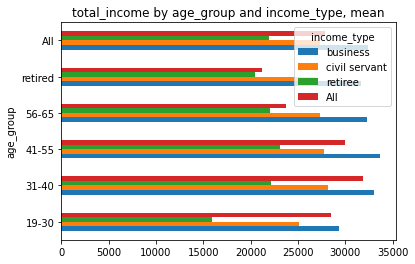

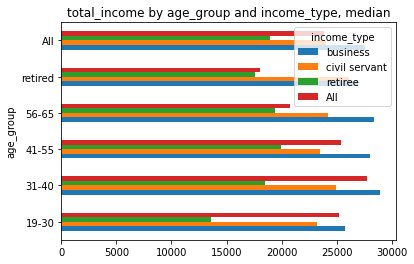

In [50]:
#age_group and income_type, mean
display(data.pivot_table(index='age_group', columns='income_type', values='total_income', aggfunc='mean', margins=True))

#plot
ax_mean = data.pivot_table(index='age_group', columns='income_type', values='total_income', aggfunc='mean', margins=True).plot(kind='barh', stacked=False, title='total_income by age_group and income_type, mean')
display(ax_mean)

#age_group and income_type, median
display(data.pivot_table(index='age_group', columns='income_type', values='total_income', aggfunc='median', margins=True))

#plot
ax_median = data.pivot_table(index='age_group', columns='income_type', values='total_income', aggfunc='median', margins=True).plot(kind='barh', stacked=False, title='total_income by age_group and income_type, median')
display(ax_mean)


<div class="alert alert-info"> <b> It doesn't look like age group is our strongest driver for total income</b> <br>
onwards
    
</div>

<div class="alert alert-info"> <b> How about age and gender? </b> <br>

</div>

gender,F,M,All
age_group,,,
19-30,25515.159533,33079.530738,28447.179508
31-40,28753.927379,37069.706629,31845.635553
41-55,27120.201024,37434.993925,29976.551817
56-65,22812.679275,27297.440928,23716.880476
retired,20680.164645,22777.926966,21174.736424
All,25434.047322,33767.848428,27842.952185


<AxesSubplot:title={'center':'total_income by age_group and income_type, mean'}, ylabel='age_group'>

gender,F,M,All
age_group,,,
19-30,22724.0,28973.0,25249.0
31-40,24986.5,32017.0,27720.0
41-55,23353.0,30411.0,25384.5
56-65,20048.0,23939.5,20811.0
retired,17881.0,18895.5,18027.0
All,22044.5,28682.5,23855.5


<AxesSubplot:title={'center':'total_income by age_group and income_type, mean'}, ylabel='age_group'>

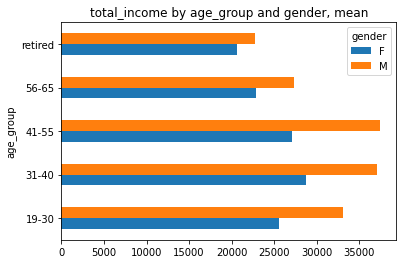

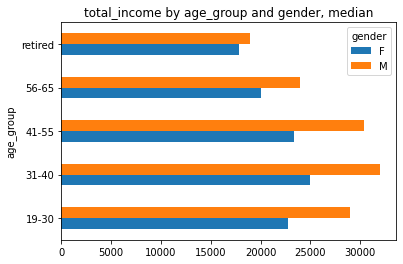

In [51]:
#age_group and gender, mean
display(data.pivot_table(index='age_group', columns='gender', values='total_income', aggfunc='mean', margins=True))

#plot
ax_gender_mean = data.pivot_table(index='age_group', columns='gender', values='total_income', aggfunc='mean', margins=False).plot(kind='barh', stacked=False, title='total_income by age_group and gender, mean')
display(ax_mean)

#age_group and income_type, median
display(data.pivot_table(index='age_group', columns='gender', values='total_income', aggfunc='median', margins=True))

#plot
ax_gender_median = data.pivot_table(index='age_group', columns='gender', values='total_income', aggfunc='median', margins=False).plot(kind='barh', stacked=False, title='total_income by age_group and gender, median')
display(ax_mean)

<div class="alert alert-info"> <b> Men in our data set earn more then Women </b> <br>

</div>

<div class="alert alert-info"> <b> How about family status and children? </b> <br>

</div>

children,0,1,2,3,4,5,All
family_status,,,,,,,
civil partnership,27110.495922,28733.787356,33265.956140,32054.533333,20141.0,20177.000000,27888.727859
divorced,27308.391892,32535.891892,31527.958333,21961.250000,52886.0,NaN,28652.923529
married,27122.622594,30090.699907,30614.242545,32551.715909,25184.0,29816.500000,28152.776065
unmarried,28543.167683,30125.243902,27232.166667,25101.000000,NaN,NaN,28732.991453
widow / widower,22410.288770,23963.235294,27867.600000,34042.333333,NaN,NaN,22600.973466
All,26945.409456,29857.487283,30990.167169,31892.500000,28421.0,26603.333333,27842.952185


<AxesSubplot:title={'center':'total_income by family and children, mean'}, ylabel='family_status'>

children,0,1,2,3,4,5,All
family_status,,,,,,,
civil partnership,23400.5,24355.0,27496.5,25192.0,20141.0,20177.0,23852.0
divorced,24192.5,26525.0,24505.0,23295.5,52886.0,NaN,24701.5
married,23328.0,25896.0,25628.0,29047.0,24753.0,29816.5,24139.5
unmarried,24699.0,25456.5,22685.0,22751.5,NaN,NaN,24801.5
widow / widower,19670.0,23343.0,25702.0,22736.0,NaN,NaN,19914.0
All,23144.5,25419.5,25707.5,26902.0,24753.0,26954.0,23855.5


<AxesSubplot:title={'center':'total_income by family and children, median'}, ylabel='family_status'>

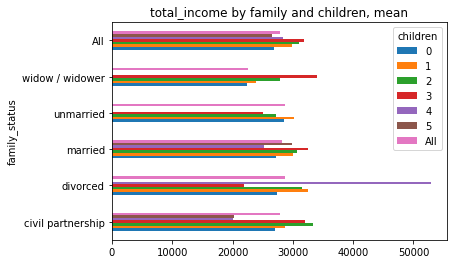

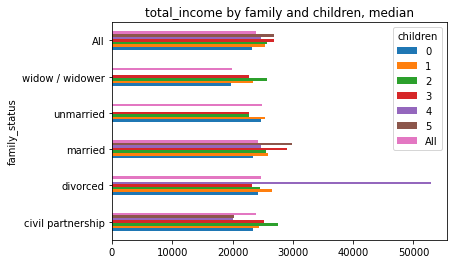

In [52]:
#family status, children, and income_type, mean
display(data.pivot_table(index='family_status', columns='children', values='total_income', aggfunc='mean', margins=True))

#plot
ax_mean_family = data.pivot_table(index='family_status', columns='children', values='total_income', aggfunc='mean', margins=True).plot(kind='barh', stacked=False, title='total_income by family and children, mean')
display(ax_mean_family)

#family status, children, and income_type, median
display(data.pivot_table(index='family_status', columns='children', values='total_income', aggfunc='median', margins=True))

#plot
ax_median_family = data.pivot_table(index='family_status', columns='children', values='total_income', aggfunc='median', margins=True).plot(kind='barh', stacked=False, title='total_income by family and children, median')
display(ax_median_family)

<div class="alert alert-info"> <b> What is going on with Divorced people with 4 children! $$$ </b> <br>
Looks like Broadly income levels are relatively consistant across number of children
</div>

In [53]:
data_divorced_four = data[(data['family_status'] == 'divorced') & (data['children'] == 4)]
display(data_divorced_four)

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,loan_purpose,age_group
2641,4,344.926495,36,bachelor's degree,0,divorced,3,F,civil servant,0,52886.0,to buy a car,0.945004,auto,31-40


<div class="alert alert-info"> <b> Divorced-4 is a Single data point </b> <br>
There is only one data point for divorced with 4 children, and they're on the high end for income in our dataset. <br>
Which brings up an interesting point, if this dataset is in USD, the numbers are VERY low overall. <br>
The Median and Mean are both below the national poverly line
</div>

,debt
education,
bachelor's degree,145
graduate degree,0
primary education,8
secondary education,492
some college,29
All,674


<AxesSubplot:title={'center':'total_income by family and children, mean'}, ylabel='family_status'>

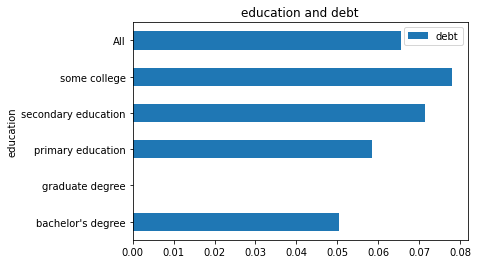

In [54]:
#Looking at education and debt
display(data.pivot_table(index='education', values='debt', aggfunc = 'sum', margins=True))

#plot
ax_mean_edu = data.pivot_table(index='education', values='debt', margins=True).plot(kind='barh', stacked=False, title='education and debt')
display(ax_mean_family)


<div class="alert alert-info"> <b> No Graduate Defaults? </b> <br>
It Looks like people with graduate degrees do not have any defaults. <br>
That's unexpected.

<div class="alert alert-info"> <b> Mean, Median, or Mode? </b> <br>
We're going to use the median income to limit the influence of outlier data at the high and low extreams of income for our dataset.
</div>

In [55]:
#  Code that we will use for filling in missing values
#data['days_employed'] = data['days_employed'].fillna(data['days_employed'].median()) 
#data['total_income'] = data['total_income'].fillna(data['total_income'].median()) 
#data['years_employed'] = data['years_employed'].fillna(data['years_employed'].median()) 



In [56]:
data.isna().sum()

children               0
days_employed       1019
age                    0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        1019
purpose                0
years_employed      1019
loan_purpose           0
age_group              0
dtype: int64

<div class="alert alert-info"> <b>This updated block of code is to fix the preveous errors in mean calculation for total income</b> <br>

</div>

In [57]:
#Generate a Multi-Index DataFrame via Pivot_Table that generates the median total_income, grouped by age_group and income_type

#Version 2
pivot_table_for_total_income = data.pivot_table(index=['age_group','income_type' ],    
columns='education',values='total_income',aggfunc='median')

#Version 3
#pivot_table_for_total_income_3 = data.pivot_table(index=['age_group','income_type', 'education'],
#                                                values='total_income',aggfunc='median')

#Test
display(pivot_table_for_total_income)

education                bachelor's degree  graduate degree  \
age_group income_type                                         
19-30     business                 28449.5              NaN   
          civil servant            24483.5              NaN   
          retiree                  34395.0              NaN   
31-40     business                 33126.0              NaN   
          civil servant            27956.5          17823.0   
          retiree                  30118.0              NaN   
41-55     business                 34923.0              NaN   
          civil servant            28702.0              NaN   
          retiree                  25451.5              NaN   
56-65     business                 32510.0              NaN   
          civil servant            29876.0              NaN   
          retiree                  23079.0          40869.0   
retired   business                 29300.0              NaN   
          civil servant            23391.0              NaN   
          retiree                  21074.0          15801.0   

education                primary education  secondary education  some college  
age_group income_type                                                          
19-30     business                 21167.5              23913.0       25571.5  
          civil servant            30564.0              21033.5       21641.0  
          retiree                      NaN              12808.0           NaN  
31-40     business                 21442.0              26304.0       30315.0  
          civil servant            21151.0              21926.0       29282.5  
          retiree                  14139.0              18328.5           NaN  
41-55     business                 27930.0              25466.5       35067.0  
          civil servant            78411.0              21533.0       42562.5  
          retiree                  16687.0              19190.5       17873.0  
56-65     business                 15519.0              26256.0       37147.0  
          civil servant            12709.5              23016.0           NaN  
          retiree                  18083.0              18692.0       20934.5  
retired   business                     NaN              24260.0       20095.0  
          civil servant                NaN              26123.0           NaN  
          retiree                  15014.0              17310.0       19790.5

In [58]:
def cal_median_income(row):
    """
    Based on age, income type, and education, return an category appropriate median value total_income.
    
    """

    age = row['age_group']
    i_type = row['income_type']
    edu = row['education']
    try: 
        median_value = data[(data['age_group'] == age) & (data['income_type'] == i_type) & (data['education'] == edu)].median()
        return median_value
    except:
        return

In [59]:
#apply the formula to rows with missing data, replace with median value based on multi-category look up.
#target total_income NaN
data.loc[data['total_income'].isna(), 'total_income']= data[data['total_income'].isna()].apply(cal_median_income,
                                                                                               axis=1)


In [60]:
#test
data.isna().sum()

children               0
days_employed       1019
age                    0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
years_employed      1019
loan_purpose           0
age_group              0
dtype: int64

In [61]:
#test
print(data['days_employed'].isna().sum())
print(data['total_income'].isna().sum())
print(data['years_employed'].isna().sum())

# Do the NaN rows look like they have updated to appropriate numbers?
data.head(15)

1019
0
1019


,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,loan_purpose,age_group
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25379.0,to have a wedding,932.235814,wedding,41-55
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40923.0,purchase of the house,2.537495,real estate,19-30
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38485.0,housing transactions,7.888225,real estate,41-55
10,2,4171.483647,36,bachelor's degree,0,married,0,M,business,0,18231.0,buy real estate,11.428722,real estate,31-40
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,17310.0,to have a wedding,NaN,wedding,retired
14,0,1844.956182,56,bachelor's degree,0,civil partnership,1,F,business,1,26421.0,buy residential real estate,5.054674,real estate,56-65
18,0,400281.136913,53,secondary education,1,widow / widower,2,F,retiree,0,9092.0,buying a second-hand car,1096.660649,auto,41-55
24,1,338551.952911,57,secondary education,1,unmarried,4,F,retiree,0,46488.0,transactions with commercial real estate,927.539597,real estate,56-65
25,0,363548.489348,67,secondary education,1,married,0,M,retiree,0,8819.0,buy real estate,996.023258,real estate,retired
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,21533.0,education,NaN,education,41-55


In [62]:
# So far So good,
# Let's run the function again for days_employed and years_employed

#apply the formula to rows with missing data, replace with median value based on multi-category look up.

#days
data.loc[data['days_employed'].isna(), 'days_employed']= data[data['days_employed'].isna()].apply(cal_median_income,
                                                                                               axis=1)
#years
data.loc[data['years_employed'].isna(), 'years_employed']= data[data['years_employed'].isna()].apply(cal_median_income,
                                                                                               axis=1)


In [63]:
#test
print(data['days_employed'].isna().sum())
print(data['total_income'].isna().sum())
print(data['years_employed'].isna().sum())

# Do the NaN rows look like they have updated to appropriate numbers?
data.head(15)

0
0
0


,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,loan_purpose,age_group
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25379.0,to have a wedding,932.235814,wedding,41-55
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40923.0,purchase of the house,2.537495,real estate,19-30
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38485.0,housing transactions,7.888225,real estate,41-55
10,2,4171.483647,36,bachelor's degree,0,married,0,M,business,0,18231.0,buy real estate,11.428722,real estate,31-40
12,0,365762.750351,65,secondary education,1,civil partnership,1,M,retiree,0,17310.0,to have a wedding,1002.089727,wedding,retired
14,0,1844.956182,56,bachelor's degree,0,civil partnership,1,F,business,1,26421.0,buy residential real estate,5.054674,real estate,56-65
18,0,400281.136913,53,secondary education,1,widow / widower,2,F,retiree,0,9092.0,buying a second-hand car,1096.660649,auto,41-55
24,1,338551.952911,57,secondary education,1,unmarried,4,F,retiree,0,46488.0,transactions with commercial real estate,927.539597,real estate,56-65
25,0,363548.489348,67,secondary education,1,married,0,M,retiree,0,8819.0,buy real estate,996.023258,real estate,retired
26,0,3346.827478,41,secondary education,1,married,0,M,civil servant,0,21533.0,education,9.169390,education,41-55


In [64]:
# Checking Data integrety
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10263 entries, 4 to 21521
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          10263 non-null  int64  
 1   days_employed     10263 non-null  float64
 2   age               10263 non-null  int64  
 3   education         10263 non-null  object 
 4   education_id      10263 non-null  int64  
 5   family_status     10263 non-null  object 
 6   family_status_id  10263 non-null  int64  
 7   gender            10263 non-null  object 
 8   income_type       10263 non-null  object 
 9   debt              10263 non-null  int64  
 10  total_income      10263 non-null  float64
 11  purpose           10263 non-null  object 
 12  years_employed    10263 non-null  float64
 13  loan_purpose      10263 non-null  object 
 14  age_group         10263 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 1.3+ MB


In [65]:
#Nan Check
data.isna().sum()

children            0
days_employed       0
age                 0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
years_employed      0
loan_purpose        0
age_group           0
dtype: int64

<div class="alert alert-block alert-danger">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
You have done a great job here, but I think the end of your analysis needs to be corrected. Basically to replace the missing values we were looking for some extra information, you have plotted graphs and tables. We cannot just replace the missing values with median value taking from the whole column. Our clients are different, have different jobs, different age and etc. The best way to replace the missing values is to create table where median total income is calculated for age group, income_type and education: 
    
    pivot_table_for_total_income = data_without_nan.pivot_table(index=['age_group','income_type' ],    
    columns='education',values='total_income',aggfunc='median')
    
This way you can create a function which will replace the missing values in total income based on age group, income type and education.
    
For days employed we can just use the dependency on income type and use this information to replace the missing values with median values. Please correct this part of the code. Years employed are not that important for our investigation.
</div>

<div class="alert alert-info"> <b> Updated as Suggested </b> <br>

</div>


## Categorization of data

[To answer the questions and test the hypotheses, you will want to work with categorized data. Look at the questions that were posed to you and that you should answer. Think about which of the data will need to be categorized to answer these questions. Below you will find a template through which you can work your way when categorizing data. The first step-by-step processing covers the text data; the second one addresses the numerical data that needs to be categorized. You can use both or none of the suggested instructions - it's up to you.]

[Despite of how you decide to address the categorization, make sure to provide clear explanation of why you made your decision. Remember: this is your work and you make all decisions in it.]


In [66]:
# Total Income has too many unique values
data['total_income'].nunique()


8361

In [67]:
#To make best use of the Data, we need to categorize total_income

#What's the range of the total_income Data?
print(data['total_income'].min())
print(data['total_income'].max())

3307.0
362497.0


array([[<AxesSubplot:title={'center':'total_income'}>]], dtype=object)

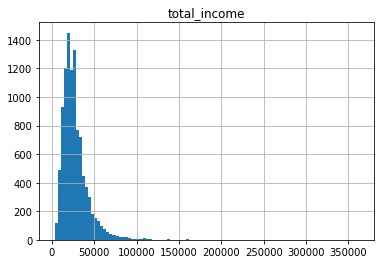

In [68]:
data.hist(column='total_income', bins=100)

<div class="alert alert-info"> <b> 25,000 bins </b> <br>
Bins for every $25,000$, and group $150,000+$ as high income since there are not very many high income earners in the data set.
</div>

!!!! Too many bins, consolidate. Combine high income into 1 or 2 categories <br>
Make bins more equal

In [69]:
#I found a version of this code on StackOverflow, utilizing groupby() and cut(). It's pretty close to what we want, but I can't quite get it dialed in...

bins = [1, 10000, 25000, 50000, 100000, 125000, 150000, 175000, 200000, 225000, 250000]
groups = data.groupby(['income_type', pd.cut(data.total_income, bins)])
groups.size().unstack()

total_income,"(1, 10000]","(10000, 25000]","(25000, 50000]","(50000, 100000]","(100000, 125000]","(125000, 150000]","(150000, 175000]","(175000, 200000]","(200000, 225000]","(225000, 250000]"
income_type,,,,,,,,,,
business,63,1839,2566,502,28,10,9,2,1,2
civil servant,57,720,559,103,4,2,0,0,0,0
retiree,387,2345,944,110,6,0,0,0,0,0


In [70]:
# Write a function that creates income categories    
def income_category_machine(i):

    """ create an income category for clients according to these bins
    [1, 10000, 25000, 50000, 75000, 100000+ high income]
    """
    income=i
    
    
    if income <= 1000:
        return '1000'
    if income >= 1000:
        if income <= 25000:
            return '1k-25k'
    if income >=25001:
        if income <= 50000:
            return '25k-50k'
    if income >= 50001:
        if income <= 75000:
            return '50k-75k'
    if income >= 75001:
        if income <= 100000:
            return '75k-100k'
    if income >= 100001:
        return '100k+ high income'

In [71]:
# Test if the function works
print(income_category_machine(1111))
print(income_category_machine(25000))
print(income_category_machine(26000))
print(income_category_machine(52000))
print(income_category_machine(75000))
print(income_category_machine(100000))
print(income_category_machine(124000))
print(income_category_machine(126000))
print(income_category_machine(150000))
print(income_category_machine(175000))
print(income_category_machine(200000))
print(income_category_machine(250000))
print(income_category_machine(275000))
print(income_category_machine(300001))

1k-25k
1k-25k
25k-50k
50k-75k
50k-75k
75k-100k
100k+ high income
100k+ high income
100k+ high income
100k+ high income
100k+ high income
100k+ high income
100k+ high income
100k+ high income


In [72]:
# Creating new column based on function
data['income_group'] = data['total_income'].apply(lambda row: income_category_machine(row))

In [73]:
# Checking how values in the new column
data['income_group'].value_counts()

1k-25k               5411
25k-50k              4069
50k-75k               595
75k-100k              120
100k+ high income      68
Name: income_group, dtype: int64

<div class="alert alert-block alert-warning">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
Success. 5 groups would be enough here.
</div>

<div class="alert alert-info"> <b> Updated as Suggested </b> <br>

</div>


## Checking the Hypotheses


<div class="alert alert-info"> <b> Is there a correlation between having children and paying back on time?</b> <br>

</div>


debt,0,1,percent_1
children,,,
0,6995.0,482.0,6.446436
1,1784.0,138.0,7.180021
2,684.0,46.0,6.301370
3,113.0,8.0,6.611570
4,10.0,NaN,NaN
5,3.0,NaN,NaN


<AxesSubplot:title={'center':'Children and debt repayment - count'}, ylabel='children'>

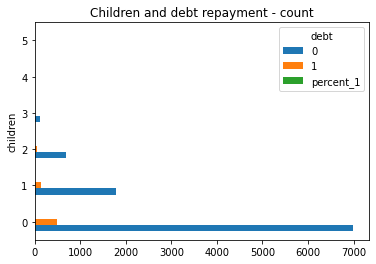

In [74]:
# Number of Children and paying back debt on time

#children, debt, values= 'days_employed'
pivot_table_children = data.pivot_table(index='children', columns='debt',values = 'days_employed', aggfunc= 'count',margins=False)

pivot_table_children['percent_1'] = (pivot_table_children[1] / (pivot_table_children[1] + pivot_table_children[0])) * 100
pivot_table_children.sort_values(by='percent_1', ascending=True)

#Dispplay Pivot_Table
display(pivot_table_children)

#plot
ax_children = pivot_table_children.plot(kind='barh', stacked=False, title='Children and debt repayment - count')

#Display Plot
display(ax_children)

<div class="alert alert-info"> <b>Conclusion</b> <br>
Debt Repayment does not strongly corrilate with number of children.
    
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
We are interested to see the percentage for each children id of how many debt were not paid in time. You almost did it in your table above. Just instead of all, we can do it like this:
    
    pivot_table_children = data.pivot_table(index='children', columns= 'debt', values='days_employed', aggfunc='count')
    pivot_table_children['percent_1'] = pivot_table_children[1] / (pivot_table_children[1] + pivot_table_children[0]) * 100
    pivot_table_children.sort_values(by='percent_1', ascending=True)
    
You can then clearly the trends. Please correct it.
</div>

<div class="alert alert-info"> <b>Updated as sugested. ty</b> <br>
    
</div>

<div class="alert alert-info"> <b>Is there a correlation between family status and paying back on time?</b> <br>

    
</div>

debt,0,1,family_%_debt_default
family_status,,,
civil partnership,1755,148,7.777194
divorced,539,25,4.432624
married,5463,354,6.085611
unmarried,1210,100,7.633588
widow / widower,622,47,7.025411


<AxesSubplot:title={'center':'Children and debt repayment - count'}, ylabel='children'>

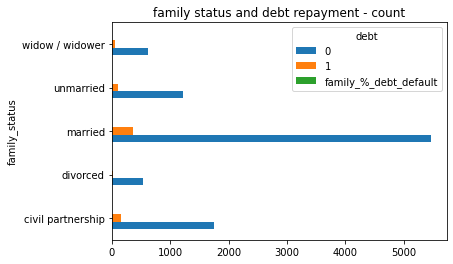

In [75]:
# Default Rate based on Family Status

#family_status, debt, values= 'days_employed'
pivot_table_family = data.pivot_table(index='family_status', columns='debt',values = 'days_employed', aggfunc= 'count',margins=False)

pivot_table_family['family_%_debt_default'] = (pivot_table_family[1] / (pivot_table_family[1] + pivot_table_family[0])) * 100
pivot_table_family.sort_values(by='family_%_debt_default', ascending=True)

#Dispplay Pivot_Table
display(pivot_table_family)

#plot
ax_pivot_table_family = pivot_table_family.plot(kind='barh', stacked=False, title='family status and debt repayment - count')

#Display Plot
display(ax_children)

<div class="alert alert-info"> <b> Conclusion</b> <br>
Contray to intuative expectation, divorced people in our dataset have the lowest defalt rate.
    
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
The last table where you calculate the percentage is done unfortunately wrong. You calculate the percentage of default debt in comparison to all default debts. We want to see for each group the amount of default debts in comparison to total debts of this particular group. So your first table at the beginning was correct. Basically, you can use the same approach as for the case with children. Please correct it.
</div>


<div class="alert alert-info"> <b> Code Updated - please confirm caculation is correct</b> <br>

    
</div>

**Is there a correlation between income level and paying back on time?**

debt,0,1,income_%_debt_default
income_group,,,
100k+ high income,64,4,5.882353
1k-25k,5044,367,6.782480
25k-50k,3804,265,6.512657
50k-75k,562,33,5.546218
75k-100k,115,5,4.166667


<AxesSubplot:title={'center':'income_group and debt repayment - count'}, ylabel='income_group'>

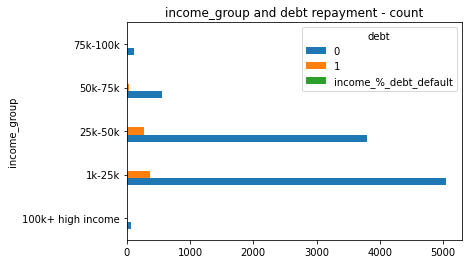

In [76]:
# Default Rate based on income_group

#income_group, debt, values= 'days_employed'
pivot_income_group = data.pivot_table(index='income_group', columns='debt',values = 'days_employed', aggfunc= 'count',margins=False)

pivot_income_group['income_%_debt_default'] = (pivot_income_group[1] / (pivot_income_group[1] + pivot_income_group[0])) * 100
pivot_income_group.sort_values(by='income_%_debt_default', ascending=True)

#Dispplay Pivot_Table
display(pivot_income_group)

#plot
ax_pivot_income_group = pivot_income_group.plot(kind='barh', stacked=False, title='income_group and debt repayment - count')

#Display Plot
display(ax_pivot_income_group)

<div class="alert alert-info"> <b> defaults in similar range accross all income groups</b> <br>
<br>
    Code updated as suggested
    
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
Here also please use the same approach as above in my comments.
</div>


<div class="alert alert-info"> <b>How does credit purpose affect the default rate?</b> <br>    
</div>

,debt
loan_purpose,
auto,7.339015
education,7.378336
real estate,5.733722
wedding,7.579909
All,6.567281


<AxesSubplot:title={'center':'loan_purpose and % Default'}, ylabel='loan_purpose'>

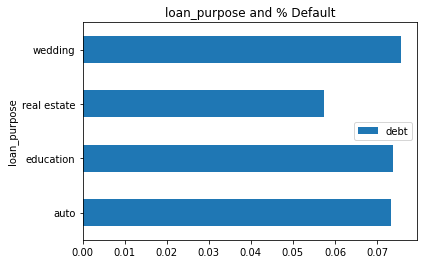

In [77]:
# Check the percentages for default rate for each credit purpose and analyze them

#loan_purpose, and income_type, mean
display(data.pivot_table(index='loan_purpose', values = 'debt', margins=True)*100)

#plot
ax_children = data.pivot_table(index='loan_purpose', values = 'debt', margins=False).plot(kind='barh', stacked=False, title='loan_purpose and % Default')
display(ax_children)



<div class="alert alert-info"> <b>Real Estate seems to have the lowest default rate</b> <br>    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
Here it is correct!
</div>



<div class="alert alert-info"><b>General Conclusion </b> <br> 

Dataset Overview
We removed 249 rows of the original dataframe, or less than 1%.
children - We droped 47 rows with a -1 for the number of children.
We dropped 1 row where the gender was listed as XNA
We dropped 4 outlier rows from the income_type column
We dropped 96 duplicates
We dropped 101 individuals who are zero years old.
We consolidated and cleaned the education section by making all the data in the column lowercase - no material change to the data.

days_employed AND ['total_income'] NaN values are still present at this point.
days_employed still has ouragously large numbers, with some people having worked for 800+ years

Civil partnerships and the unmarried seem to have the highest default rate in the 9% range.
Divorced and married are slightly less risky at ~7%.
Widow and widdowers are the safest investmenet for the firm at a ~6% default rate.

Real Estate has the lowest default rate.

The mean default rate accross our entire sample is 8.12%

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Thank you for uploading your work! I like your ideas and you are moving in the right direction! Just we need to correct some points.
</div>

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

   
1) Please use the same style for your writing in markdown cells, so we can separate text from code. Name chapters accordingly and give them the right titles and numeration.
    
2) If you are not sure about certain topics or parts of the code, you can always ask for advice from your teacher. Of course i am here will help you as well, but i cannot unfortunately to reply that fast on your questions and it will make the procedure of submitting this project even longer.
    
3) Before sending your work, run all cells one more time to make sure there are no errors.
    
4) I have checked so far your project till the moment where the error occured. But I can tell you, you are on the right direction, so be more confident in your ideas and implement them, if there must be some corrections done, I will let you know:) So you can continue with categorization chapter. 
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
Overall you have really good ideas, just it is a bit chaotic. I understand you are trying to apply different methods and use different strategies. It is good, just correct the open points and send me your work back. Looking forward to get your work back!
</div>


<div class="alert alert-info"> <b>2022-03-25 Thanks for your help.</b><br>
    <br>
    I've learned a lot since I've started this project. <br>
    <br> Now that I have a better sense for what's involved, I expect future projects will be much more organized.
</div>
    